In [40]:
import pandas as pd
import glob
from functools import reduce
    
def merge_csv_files(input_files, output_file_name):

    # Merge multiple CSV files in a folder into a single CSV file

    df_list = []

    for filename in input_files:
        df = pd.read_csv(filename, index_col=None, header=0, dtype = 'object', encoding= 'latin1')
        df_list.append(df)

    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['VAERS_ID'],
                                            how='outer'), df_list) 
    
    #combined_df.to_csv(output_file_name, index=False)
    #print(df_list)
    
    pd.DataFrame.to_csv(df_merged, output_file_name, sep=',', na_rep='void', index=False)
   
merge_csv_files(["2021VAERSVAX.csv", "2022VAERSVAX.csv","2021VAERSSYMPTOMS.csv", "2022VAERSSYMPTOMS.csv"], "VAERS_ALL.csv")

In [66]:
pip install --user -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:0000:0100:010m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# merging files (for presentation)
dfsym = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfsym = dfsym.head()

df = dfsym[['SYMPTOM3']]

print(df)

                   SYMPTOM3
0  SARS-CoV-2 test negative
1                       NaN
2                       NaN
3         Pain in extremity
4        Mobility decreased


In [33]:
# downloads for lemmatizing data

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/matthew/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/matthew/nltk_data...


True

In [34]:
# cleaning data (for presentation) and lemmatization example

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
#p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

lemmatizer = WordNetLemmatizer()

# list for tokenized documents in loop
texts = []

# merging files
dfsym = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfsym = dfsym.head()
dfvax = dfvax.head()

dfmerged = pd.concat([dfvax, dfsym], axis=1)
df = dfmerged[['VAX_MANU','SYMPTOM3']]

# fill empty cells
df = df.fillna('the')

# change type to string
df = df.astype(str)

for i in df.SYMPTOM3:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(lemma_tokens)

# prints list vertically instead of horizontally
for i in texts:
    print(i)


['sars', 'cov', 'test', 'negative']
[]
[]
['pain', 'extremity']
['mobility', 'decreased']


In [51]:
# LDA Topic Modelling

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# merging files
dfsym = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfmerged = pd.concat([dfvax, dfsym], axis=1)
df = dfmerged[['VAX_MANU','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

# extracting top 5 manufacturers
dfpbt = df[df['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
#dfgsk = df[df['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
#dfjanssen = df[df['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
#dfmerck = df[df['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
#dfmoderna = df[df['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# new dataframe of just top 5
#dfnew = pd.concat([dfpbt, dfgsk, dfjanssen, dfmerck, dfmoderna], axis=0)

# replace empty cells with stopword
dfnew = dfpbt.replace('void', 'the')
dfnew = dfnew.fillna('the')

# change type to string
dfnew = dfnew.astype(str)

# loop through document list
for i in dfnew.SYMPTOM1:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

for i in dfnew.SYMPTOM2:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM3:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM4:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM5:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=15)
print(ldamodel.print_topics(num_topics=15, num_words=10))



[(0, '0.352*"fatigu" + 0.221*"pruritu" + 0.066*"urin" + 0.062*"reaction" + 0.046*"analysi" + 0.034*"pallor" + 0.030*"nasopharyng" + 0.024*"post" + 0.020*"immedi" + 0.018*"ocular"'), (1, '0.355*"vaccin" + 0.102*"rate" + 0.086*"heart" + 0.085*"increas" + 0.075*"malais" + 0.041*"rhinorrhoea" + 0.030*"migrain" + 0.030*"loss" + 0.029*"tachycardia" + 0.027*"conscious"'), (2, '0.421*"site" + 0.169*"inject" + 0.081*"electrocardiogram" + 0.081*"swell" + 0.062*"warmth" + 0.052*"erythema" + 0.032*"syncop" + 0.022*"tight" + 0.020*"pneumonia" + 0.015*"discolour"'), (3, '0.165*"nausea" + 0.154*"extrem" + 0.134*"cov" + 0.134*"sar" + 0.122*"test" + 0.074*"vomit" + 0.073*"posit" + 0.040*"imag" + 0.039*"magnet" + 0.039*"reson"'), (4, '0.380*"rash" + 0.127*"urticaria" + 0.094*"head" + 0.053*"joint" + 0.052*"product" + 0.039*"seizur" + 0.039*"inflamm" + 0.030*"dose" + 0.026*"macular" + 0.025*"fall"'), (5, '0.526*"pyrexia" + 0.068*"impair" + 0.067*"tremor" + 0.048*"musculoskelet" + 0.035*"stiff" + 0.028*"v

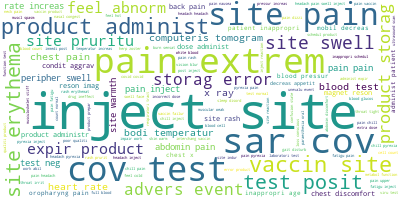

In [29]:
# Wordcloud Generator

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models


tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# extracting columns
dfsym1 = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax1 = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfsym2 = pd.read_csv('2022VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax2 = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

df1 = pd.concat([dfvax1, dfsym1], axis=1)
df2 = pd.concat([dfvax2, dfsym2], axis=1)

df = pd.concat([df1, df2], axis=0)

df = df.loc(axis=1)['VAX_MANU','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']

# extracting top 5 manufacturers
dfpbt = df[df['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
dfgsk = df[df['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
dfjanssen = df[df['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
dfmerck = df[df['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
dfmoderna = df[df['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# new dataframe of just top 5
dfnew = pd.concat([dfpbt, dfgsk, dfjanssen, dfmerck, dfmoderna], axis=0)

# replace empty cells with stopword
dfnew = dfnew.replace('void', 'the')
dfnew = dfnew.fillna('the')

# change type to string
dfnew = dfnew.astype(str)

# loop through document list
for i in dfnew.SYMPTOM1:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

for i in dfnew.SYMPTOM2:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM3:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM4:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM5:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# Import the wordcloud library
from wordcloud import WordCloud
import os
from os import path

# Converts arrray to txt file
with open("wordcloud.txt", "w") as txt_file:
    for line in texts:
        txt_file.write(" ".join(line) + "\n") # works with any number of elements in a line

#open text file in read mode
text_file = open("wordcloud.txt", "r")

#read whole file to a string
data = text_file.read()

#close file
text_file.close()        
        
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(data)
# Visualize the word cloud
wordcloud.to_image()


In [49]:
import pandas as pd

dfvax = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdata = pd.read_csv('2022VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfmerged = pd.concat([dfvax, dfdata], axis=1)

# replace empty cells with -1
df_age = dfmerged.fillna(-1)

# change dtype of list
df_age['AGE_YRS'] = df_age['AGE_YRS'].astype(float)
df_age['AGE_YRS'] = df_age['AGE_YRS'].astype(int)

# extracting age data for each company
dfpbt = df_age[df_age['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
dfgsk = df_age[df_age['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
dfjanssen = df_age[df_age['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
dfmerck = df_age[df_age['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
dfmoderna = df_age[df_age['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# creating bins for age range and placing data into bins
pbt_age = pd.cut(dfpbt['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
gsk_age = pd.cut(dfgsk['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
janssen_age = pd.cut(dfjanssen['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
merck_age = pd.cut(dfmerck['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
moderna_age = pd.cut(dfmoderna['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)

#counting data
pbt_age_count = pbt_age.value_counts()
gsk_age_count = gsk_age.value_counts()
janssen_age_count = janssen_age.value_counts()
merck_age_count = merck_age.value_counts()
moderna_age_count = moderna_age.value_counts()

# creating new dataframe
dfage_merged = pd.concat([pbt_age_count, moderna_age_count, gsk_age_count, merck_age_count, janssen_age_count], axis=1)

dfage_merged.columns.values[0] = "PfizerBioNTech"
dfage_merged.columns.values[1] = "GSK"
dfage_merged.columns.values[2] = "Janssen"
dfage_merged.columns.values[3] = "Merck"
dfage_merged.columns.values[4] = "Moderna"
dfage_merged.head()

,PfizerBioNTech,GSK,Janssen,Merck,Moderna
"(50.0, 70.0]",31393,25504,3378,2425,2471
"(-10.001, 0.0]",29671,24768,4777,2616,2154
"(30.0, 50.0]",20706,16668,2013,1393,1726
"(70.0, 120.0]",18503,14806,2093,1479,1383
"(0.0, 12.0]",8537,6726,944,681,564


In [39]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

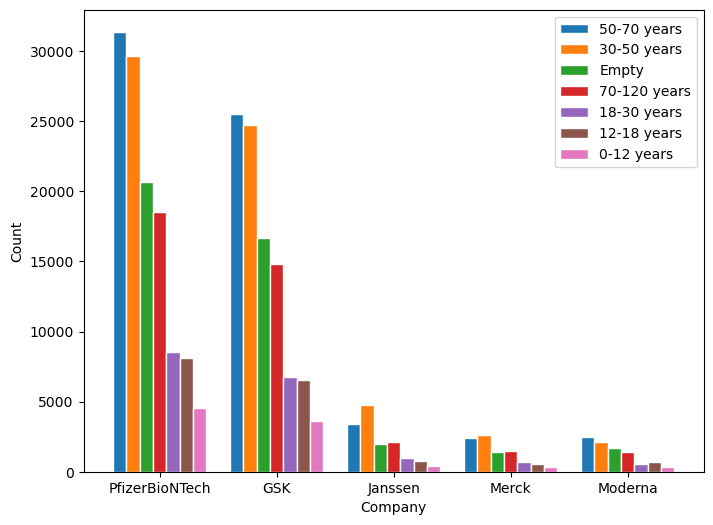

In [50]:
dfage_mergedT = dfage_merged.transpose()
plot2 = dfage_mergedT.plot.bar(rot=0, width = 0.8, figsize = (8,6), edgecolor='white', linewidth=1)

plot2.legend(["50-70 years", "30-50 years", 'Empty', '70-120 years', '18-30 years', '12-18 years', '0-12 years']);
plot2.set_xlabel('Company');
plot2.set_ylabel('Count');
#plot2.set_title('2022 Age Distribution');

In [30]:
# Merge duplicates into same cell

df = pd.read_csv("2023VAERSVAX.csv", index_col=None, header=0, dtype = 'object', encoding= 'latin1')
df = df.fillna('void')

test = df.groupby(by=['VAERS_ID'], dropna=False).agg(lambda x: ', '.join(x))

#print(test.head())

In [34]:
# removes everything after first comma in list (probably won't need)
df = pd.read_csv("2023VAERS_ALL.csv", index_col=None, header=0, dtype = 'object', encoding= 'latin1')

df['VAX_MANU'] = df['VAX_MANU'].str.split(',').str[0]
